# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [214]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [215]:
df = pd.read_csv('./heights.csv')

In [216]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


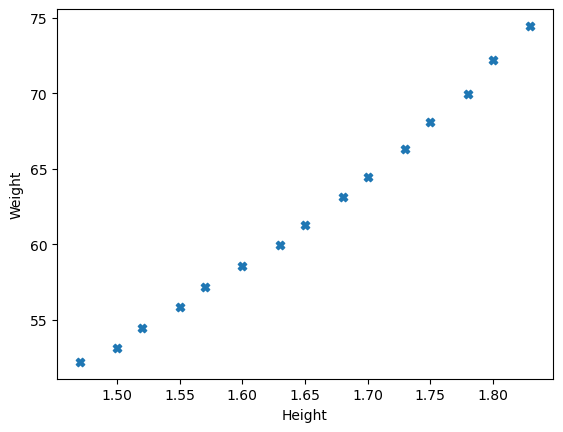

In [217]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [218]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [219]:
class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs

    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        self.obs, self.features = X.shape
        
        self.weights = np.zeros(self.features)
        self.bias = 0

        for i in range(self.epochs):
            self.update_weights(X,y)
        
    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights using batch gradient descent.

        Args:
            X: features
            y: target
        """
        yPredicted = self.predict(X)
        grad_w = -2 * np.dot(X.T, (y - yPredicted)) / self.obs
        grad_b = -2 * np.sum(y - yPredicted) / self.obs
        self.weights = self.weights - self.lr * grad_w
        self.bias = self.bias - self.lr * grad_b

    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features

        Returns:
            The predicted value.
        """
        return X.dot(self.weights) + self.bias
    
    def tell_weights_bias(self):
        return (self.weights, self.bias)

### Build the model and train on the dataset.

In [220]:
model1 = LinearRegression(0.01, 100000)
model1.train(X_train, y_train)

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [221]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    return np.mean(np.square(y_pred - y_actual))

### Make predictions using the model and evaluate it.

In [222]:
y_pred = model1.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.4994


### Plot the predicted and the actual values.

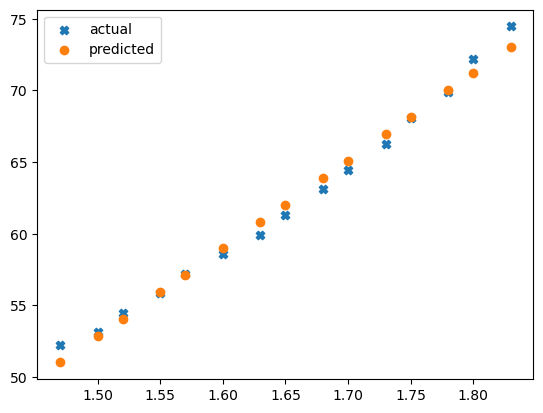

In [223]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [224]:
df = pd.read_csv('./advertise.csv')

In [225]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [226]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [227]:
def dataset_minmax(dataset):
    """
    Finds the min and max values for each column.
    """
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to the range 0-1.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

def unnormalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to their original values.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return dataset

In [228]:
minmax = dataset_minmax(X)
X_normalized = normalize_dataset(X, minmax)

### Split the data into train and test set.

In [229]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [230]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [231]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [232]:
model2 = LinearRegression(0.01, 100000)
print(X_train.shape, y_train.shape)
model2.train(X_train, y_train)
print(model2.weights)

(160, 3) (160,)


[16.11839139  5.00688997  0.49307674]


### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [233]:
print("Training MSE: {:.4f}".format(mean_squared_error(model2.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model2.predict(X_test), y_test)))

Training MSE: 2.6761
Test MSE: 2.9078


# Using Closed Form Solution(75)


* For both the above 2 models you need to try out the closed form solutions
* The more efforts you put in, the more marks you get.
* It is open ended

In [234]:
weights1, bias1 = model1.tell_weights_bias()
weights2, bias2 = model2.tell_weights_bias()
print(weights1,bias1)
print(weights2,bias2)

[61.22280963] -38.98018435343468
[16.11839139  5.00688997  0.49307674] 4.753583885846188


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [235]:
df = pd.read_csv('./heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [236]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [237]:
class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs

    # Function for model training
    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        self.obs, self.features = X.shape
        
        self.weights = np.zeros(self.features)
        self.bias = 0

        for i in range(self.epochs):
            self.update_weights(X,y)

    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights in gradient descent.

        Args:
            X: features
            y: target
        """
        A = self.predict(X)
          
        tmp = (A - y.T)
        tmp = np.reshape(tmp, self.obs)
        dW = np.dot(X.T, tmp)/self.obs
        db = np.sum(tmp)/self.obs
          
        self.weights -= self.lr * dW     
        self.bias -= self.lr * db 

    def predict(self, X):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            The predicted probability.
        """
        Z = 1/(1 + np.exp(-(X.dot(self.weights) + self.bias)))
        
        return Z

### Build the model and train on the dataset.

In [238]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [239]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    return (np.dot(y_pred, y_actual) + np.dot(1-y_pred, 1-y_actual))/y_pred.shape[0]


### Make predictions using the model and evaluate it.

In [240]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 1.0


### Plot the predicted and the actual values.

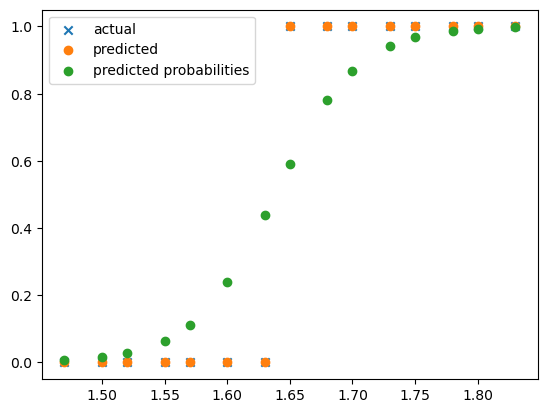

In [241]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()

# K Means Clustering(100 marks)



In [245]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the two Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



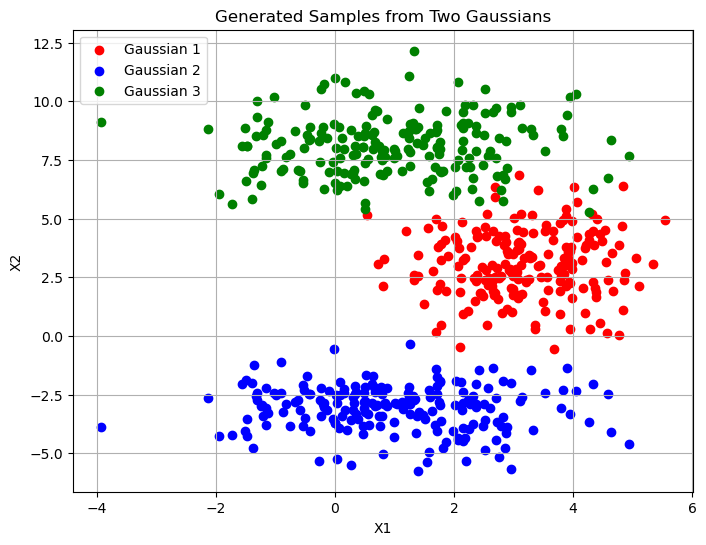

In [246]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples2[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()

The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

In [247]:
def d(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [248]:
alls = np.concatenate((samples1, samples2, samples3))
allcol=np.zeros(alls.shape[0])
clusters=3
centers = alls[np.random.randint(0,alls.shape[0],3)]
print(centers)

[[  1.72912819   3.77721832]
 [-11.63422001   8.45144998]
 [  1.33184805  -2.74724449]]


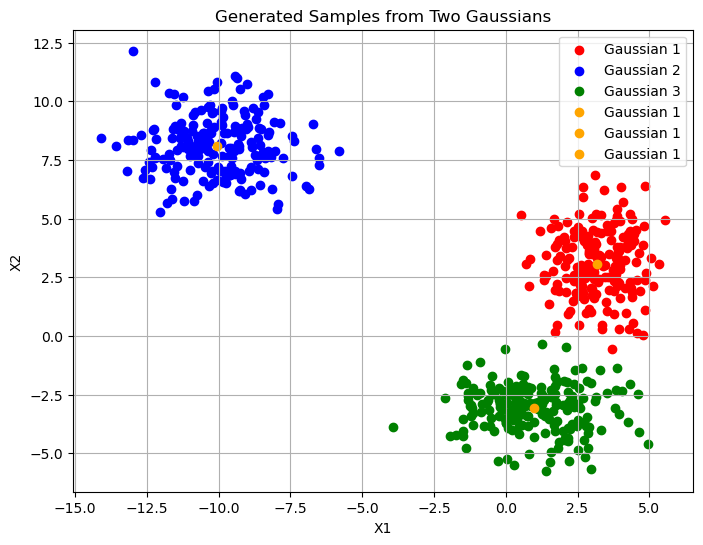

In [249]:
for i in range(50):
    for j in range(alls.shape[0]):
        kmin = 0
        dmin=-1
        for k in range(clusters):
            ds = d(alls[j],centers[k])
            if ds<dmin or dmin==-1:
                dmin=ds
                kmin=k
        allcol[j] = kmin
    for k in range(clusters):
        centers[k] = (np.mean(alls[allcol==k],axis=0))

plt.figure(figsize=(8, 6))
plt.scatter(alls[allcol==0][:, 0], alls[allcol==0][:, 1], c='red', label='Gaussian 1')
plt.scatter(alls[allcol==1][:, 0], alls[allcol==1][:, 1], c='blue', label='Gaussian 2')
plt.scatter(alls[allcol==2][:, 0], alls[allcol==2][:, 1], c='green', label='Gaussian 3')
plt.scatter(centers[0][0], centers[0][1], c='orange', label='Gaussian 1')
plt.scatter(centers[1][0], centers[1][1], c='orange', label='Gaussian 1')
plt.scatter(centers[2][0], centers[2][1], c='orange', label='Gaussian 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()